## Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`

### Data preparation

* Select only the features from above and transform their names using next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`


### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`


### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.


## Submit the results

* Submit your results here: https://forms.gle/FFfNjEP4jU4rxnL26
* You can submit your solution multiple times. In this case, only the last submission will be used 
* If your answer doesn't match options exactly, select the closest one


## Deadline

The deadline for submitting is 2 October (Monday), 23:00 CEST.

After that, the form will be closed.

## Get Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [3]:
!wget $data

--2023-10-02 17:50:00--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv'

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.007s  

2023-10-02 17:50:00 (215 MB/s) - 'data.csv' saved [1475504/1475504]



In [4]:
df = pd.read_csv("./data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preparation

In [7]:
selected_columns = [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP"
]

df = df[selected_columns]

In [8]:
df["price"] = df["MSRP"]
del df["MSRP"]

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [10]:
df = df.fillna(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


## Q1

In [12]:
df["transmission_type"].value_counts()

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

In [13]:
df["transmission_type"].value_counts(normalize=True)

transmission_type
automatic           0.693806
manual              0.246349
automated_manual    0.052543
direct_drive        0.005708
unknown             0.001595
Name: proportion, dtype: float64

Answer: automatic

## Q2

### Feature importance: correlation

In [14]:
numerical = [col for col, dtype in df.dtypes.items() if dtype in ['int64', 'float64']]
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

In [15]:
numerical.remove("price")

In [16]:
df[numerical].corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


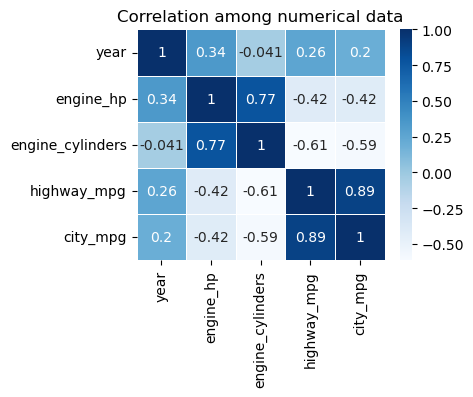

In [17]:
plt.figure(figsize=(4, 3))  
sns.heatmap(df[numerical].corr(), annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation among numerical data")
plt.show()

Answer: highway_mpg and city_mpg

## Q3

### Make price binary

In [18]:
mean_price = df['price'].mean()

In [19]:
df['above_average'] = (df['price'] > mean_price).astype(int)

In [20]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0


### Split data for training/validation/test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [23]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [24]:
df_full_train = df_full_train.reset_index(drop=True)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
y_train = df_train["above_average"].values
y_val = df_val["above_average"].values
y_test = df_test["above_average"].values

del df_train["above_average"]
del df_val["above_average"]
del df_test["above_average"]

### Feature importance: mutual information

In [27]:
from sklearn.metrics import mutual_info_score

In [28]:
categorical = [col for col, dtype in df.dtypes.items() if dtype == 'object']
categorical

['make', 'model', 'transmission_type', 'vehicle_style']

In [29]:
def mutual_info_above_average_score(series):
    return mutual_info_score(series, df_full_train["above_average"])

In [30]:
mi = df_full_train[categorical].apply(mutual_info_above_average_score)
print(round(mi.sort_values(ascending=False), 3))

model                0.461
make                 0.239
vehicle_style        0.083
transmission_type    0.021
dtype: float64


## Q4

### One-hot encoding

In [31]:
from sklearn.feature_extraction import DictVectorizer

In [32]:
dv = DictVectorizer(sparse=False)

In [33]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [34]:
train_dict[0:1]

[{'make': 'mitsubishi',
  'model': 'endeavor',
  'transmission_type': 'automatic',
  'vehicle_style': '4dr_suv',
  'year': 2011,
  'engine_hp': 225.0,
  'engine_cylinders': 6.0,
  'highway_mpg': 19,
  'city_mpg': 15}]

In [35]:
dv.get_feature_names_out()[0:10]

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=acura', 'make=alfa_romeo', 'make=aston_martin', 'make=audi',
       'make=bentley', 'make=bmw'], dtype=object)

In [36]:
print(X_train.shape)
print(X_val.shape)

(7148, 943)
(2383, 943)


### Logistic regression training

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)  

In [39]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [40]:
model.intercept_[0]

-0.36217058412908215

In [41]:
model.coef_[0].round(3)[0:10]

array([ 0.078, -0.121,  0.037, -0.003,  1.354,  1.807,  0.598,  2.916,
        0.179,  2.393])

In [42]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([1.24035511e-03, 9.95823084e-01, 1.82185740e-04, ...,
       4.37509052e-04, 9.90162155e-01, 9.86556641e-01])

In [43]:
is_above_average = (y_pred >= 0.5)
is_above_average

array([False,  True, False, ..., False,  True,  True])

In [44]:
is_above_average.astype(int)

array([0, 1, 0, ..., 0, 1, 1])

In [45]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = is_above_average.astype(int)
df_pred['actual'] = y_val

In [46]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [47]:
val_accuracy = df_pred.correct.mean()

In [48]:
print(f"validation accuracy: {val_accuracy:.4f}")

validation accuracy: 0.9471


## Q5

### Feature elimination

In [49]:
features = numerical + categorical

In [50]:
selected_features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']

In [51]:
print("feature removed:", "validation accuracy,", "diff")

for item in selected_features:
    subset = features.copy()
    subset.remove(item)

    dv = DictVectorizer(sparse=False)

    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]

    is_above_average = (y_pred >= 0.5).astype(int)

    subset_accuracy = (is_above_average == y_val).mean()

    diff = val_accuracy - subset_accuracy

    print(f"{item}: {subset_accuracy:.4f}, {diff:.4f}")


feature removed: validation accuracy, diff
year: 0.9475, -0.0004
engine_hp: 0.9240, 0.0231
transmission_type: 0.9450, 0.0021
city_mpg: 0.9324, 0.0147


## Q6

### Ridge regression with DictVectorizer

In [52]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [53]:
df_train['price']=np.log1p(df_train['price'])
df_val['price']=np.log1p(df_val['price'])
df_test['price']=np.log1p(df_test['price'])

In [54]:
y_train = df_train["price"].values
y_val = df_val["price"].values
y_test = df_test["price"].values

In [55]:
dv = DictVectorizer(sparse=True)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [56]:
alphas = [0, 0.01, 0.1, 1, 10]

In [57]:
print("alpha:", "RMSE")

for a in alphas:
    model = Ridge(alpha=a, solver="sag", max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    
    print(f"{a}: {rmse:.4f}")

alpha: RMSE
0: 0.2512
0.01: 0.2549
0.1: 0.2550
1: 0.2583
10: 0.3360


### Ridge regression with Feature scaling + OHE

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [59]:
X_train_num = df_train[numerical].values

scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_num = scaler.fit_transform(X_train_num)

In [60]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [61]:
X_train_cat = ohe.fit_transform(df_train[categorical].values)

In [62]:
ohe.get_feature_names_out().shape

(938,)

In [63]:
X_train = np.column_stack((X_train_num, X_train_cat))

In [64]:
X_val_num = df_val[numerical].values
X_val_num = scaler.transform(X_val_num)

X_val_cat = ohe.transform(df_val[categorical].values)

X_val = np.column_stack([X_val_num, X_val_cat])

In [65]:
alphas = [0, 0.01, 0.1, 1, 10]

In [66]:
print("alpha:", "RMSE")

for a in alphas:
    model = Ridge(alpha=a, solver="sag", max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    print(f"{a}: {rmse:.4f}")

alpha: RMSE


/home/studio-lab-user/.conda/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0: 0.2236


/home/studio-lab-user/.conda/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01: 0.2237


/home/studio-lab-user/.conda/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1: 0.2243


/home/studio-lab-user/.conda/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1: 0.2344
10: 0.3210
